In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("weight-height - weight-height.csv")

In [3]:
df.head()

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.tail()

,Gender,Weight,Height
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [5]:
df.shape

(10000, 3)

In [6]:
df.describe()

,Weight,Height
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [7]:
df.columns

Index(['Gender', 'Weight', 'Height'], dtype='object')

In [8]:
df.dtypes

Gender     object
Weight    float64
Height    float64
dtype: object

In [9]:
df.isnull().sum().sort_values(ascending=False)

Gender    0
Weight    0
Height    0
dtype: int64

In [10]:
df["Gender"].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

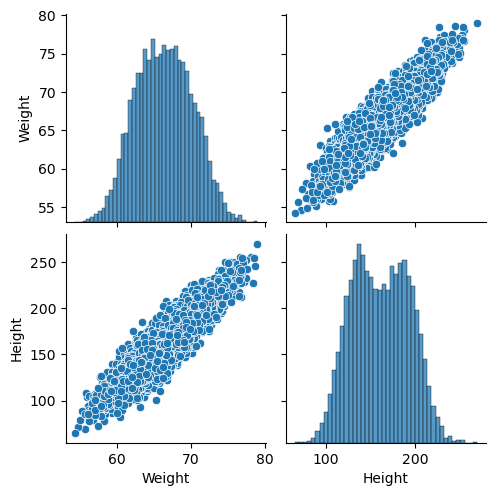

In [11]:
sns.pairplot(df)

In [12]:
!pip install category_encoders

In [13]:
import category_encoders as ce
encoder= ce.OneHotEncoder(cols='Gender')
df=encoder.fit_transform(df)
df.head()

,Gender_1,Gender_2,Weight,Height
0,1,0,73.847017,241.893563
1,1,0,68.781904,162.310473
2,1,0,74.110105,212.740856
3,1,0,71.730978,220.042470
4,1,0,69.881796,206.349801


In [14]:
df.dtypes

Gender_1      int64
Gender_2      int64
Weight      float64
Height      float64
dtype: object

In [15]:
# split the dataset into input features and target value
x=df.drop('Height',axis=1)
y=df['Height']
x.head()

,Gender_1,Gender_2,Weight
0,1,0,73.847017
1,1,0,68.781904
2,1,0,74.110105
3,1,0,71.730978
4,1,0,69.881796


In [16]:
y.head

<bound method NDFrame.head of 0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Height, Length: 10000, dtype: float64>

In [17]:
#divide into train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
x_train.shape,y_train.shape

((8000, 3), (8000,))

In [19]:
x_test.shape,y_test.shape

((2000, 3), (2000,))

In [20]:
# apply ml alogirthm to training data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
#model prediction
y_pred=model.predict(x_test)

In [22]:
y_pred

array([141.93828842, 176.55658781, 219.77836196, ..., 149.97129636,
       166.83374902, 138.87940677])

In [23]:
#find r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100
print("r2_score of the model is",round(r2_score(y_test,y_pred)*100,2),"%")

r2_score of the model is 90.53 %


In [24]:
# find MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

7.955916524719642

In [25]:
#find MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

97.87152217990108

In [26]:
#find RMSE
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,y_pred)

9.893003698569059

In [ ]:
y_pred=model.predict([[1,0,174]])
print('My predicted height=',y_pred)

My predicted height= [812.93298466]
